# Partie 1 : GOOGL 10 ans : LT, risqué

Train RMSE: 13.73214340505188
Test RMSE: 13.515047907154933
Backtest Statistics:
Mean Return (Stock): 0.0040
Mean Return (Strategy): 0.0070
Cumulative Return (Stock): 243.39%
Cumulative Return (Strategy): 198.16%
Variance (Stock): 0.0014
Variance (Strategy): 0.0042
Beta: nan
Sharpe Ratio (Stock): 1.7037
Sharpe Ratio (Strategy): 1.7249
Maximum Drawdown: -40.66%


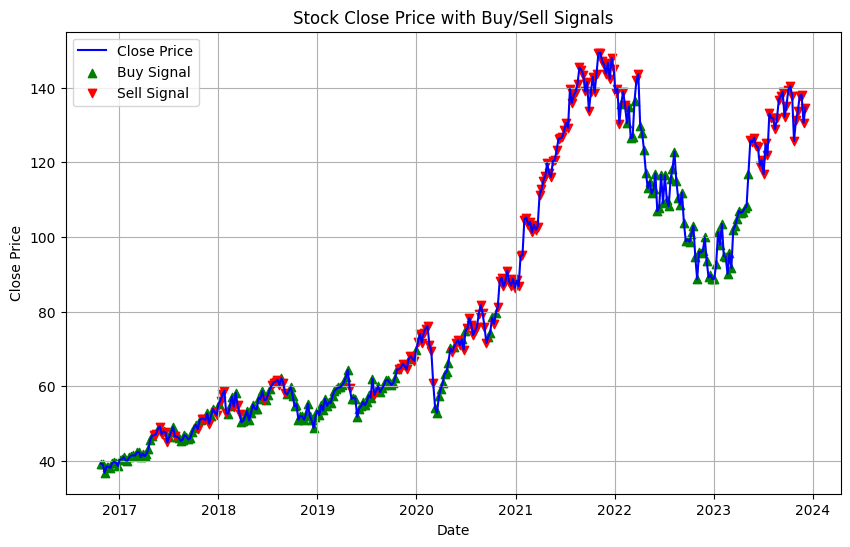

In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Updated URLs with Raw file paths
url_GM_10years = 'https://raw.githubusercontent.com/Cosima2/Project-Python/main/GM_10years.csv'
url_GM_1year = 'https://raw.githubusercontent.com/Cosima2/Project-Python/main/GM_1year.csv'
url_GOOGL_10years = 'https://raw.githubusercontent.com/Cosima2/Project-Python/main/GOOGL-10years.csv'
url_GOOGL_1year = 'https://raw.githubusercontent.com/Cosima2/Project-Python/main/GOOGL_1year.csv'

# Read CSV files
data_GOOGL_10years = pd.read_csv(url_GOOGL_10years, parse_dates=['Date'], index_col='Date')

# Assuming 'data' is one of the datasets loaded, replace it with the desired data for analysis
data = data_GOOGL_10years 

# Feature Engineering
data['SMA_50'] = data['Close'].rolling(window=50).mean()  # 50-day Simple Moving Average
data['SMA_200'] = data['Close'].rolling(window=200).mean()  # 200-day Simple Moving Average
data['Daily_Return'] = data['Close'].pct_change()  # Daily return
data.dropna(inplace=True)

# Define features and target variable
features = ['SMA_50', 'SMA_200', 'Daily_Return']
target = 'Close'

X = data[features]
y = data[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Evaluate model performance
train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")

# Example trading strategy based on predicted price vs. actual price
predicted_prices = model.predict(X)
data['Predicted_Close'] = predicted_prices

# Buy if predicted price > current price, sell if predicted price < current price
data['Signal'] = np.where(data['Predicted_Close'] > data['Close'], 1, -1)

# Calculate Cumulative Return
cumulative_return_strategy = (1 + data[data['Signal'] == 1]['Close'].pct_change()).cumprod().iloc[-1] - 1
cumulative_return_stock = (1 + data['Close'].pct_change()).cumprod().iloc[-1] - 1

# Calculate maximum drawdown
def calc_drawdown(cum_rets):
    running_max = np.maximum.accumulate(cum_rets)
    running_max[running_max < 1] = 1
    drawdown = (cum_rets) / running_max - 1
    return drawdown

cumulative_values = np.array(data['Close'])
drawdown = calc_drawdown(cumulative_values)
max_drawdown = np.min(drawdown)

# Calculate Sharpe Ratio
daily_returns_strategy = data[data['Signal'] == 1]['Close'].pct_change()
daily_returns_stock = data['Close'].pct_change()

sharpe_ratio_strategy = (daily_returns_strategy.mean() / daily_returns_strategy.std()) * np.sqrt(252)
sharpe_ratio_stock = (daily_returns_stock.mean() / daily_returns_stock.std()) * np.sqrt(252)

# Calculate mean return
mean_return_strategy = daily_returns_strategy.mean()
mean_return_stock = daily_returns_stock.mean()

# Calculate variance
variance_strategy = daily_returns_strategy.var()
variance_stock = daily_returns_stock.var()

# Filter out NaN values in both arrays and align them
valid_dates = daily_returns_strategy.index.intersection(daily_returns_stock.index)
daily_returns_strategy_aligned = daily_returns_strategy.loc[valid_dates]
daily_returns_stock_aligned = daily_returns_stock.loc[valid_dates]

# Calculate covariance
covariance = np.cov(daily_returns_strategy_aligned, daily_returns_stock_aligned)[0, 1]

# Calculate beta
beta = covariance / variance_stock


# Print backtest statistics
print("Backtest Statistics:")
print(f"Mean Return (Stock): {mean_return_stock:.4f}")
print(f"Mean Return (Strategy): {mean_return_strategy:.4f}")
print(f"Cumulative Return (Stock): {cumulative_return_stock * 100:.2f}%")
print(f"Cumulative Return (Strategy): {cumulative_return_strategy * 100:.2f}%")
print(f"Variance (Stock): {variance_stock:.4f}")
print(f"Variance (Strategy): {variance_strategy:.4f}")
print(f"Beta: {beta:.4f}")
print(f"Sharpe Ratio (Stock): {sharpe_ratio_stock:.4f}")
print(f"Sharpe Ratio (Strategy): {sharpe_ratio_strategy:.4f}")
print(f"Maximum Drawdown: {max_drawdown * 100:.2f}%")

# Plot stock price with buy/sell signals
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Close'], label='Close Price', color='blue')
plt.scatter(data[data['Signal'] == 1].index, data['Close'][data['Signal'] == 1], marker='^', color='g', label='Buy Signal')
plt.scatter(data[data['Signal'] == -1].index, data['Close'][data['Signal'] == -1], marker='v', color='r', label='Sell Signal')
plt.title('Stock Close Price with Buy/Sell Signals')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

# Partie 2 : GM 1 an : CT, pas risqué

Train RMSE: 0.5794644959867785
Test RMSE: 0.8616888625952823
Backtest Statistics:
Mean Return (Stock): 0.0038
Mean Return (Strategy): 0.0132
Cumulative Return (Stock): 13.91%
Cumulative Return (Strategy): 23.37%
Variance (Stock): 0.0007
Variance (Strategy): 0.0017
Beta: nan
Sharpe Ratio (Stock): 2.3637
Sharpe Ratio (Strategy): 5.0985
Maximum Drawdown: -10.48%


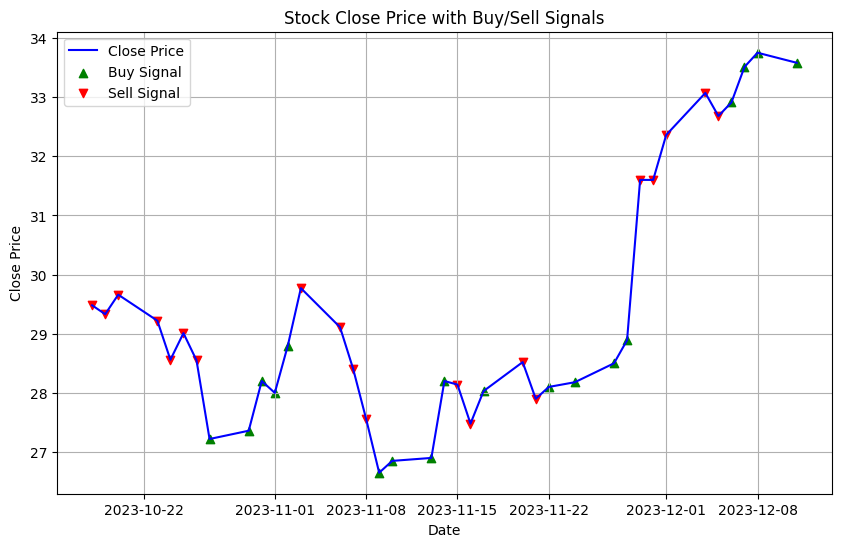

In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Updated URLs with Raw file paths
url_GM_10years = 'https://raw.githubusercontent.com/Cosima2/Project-Python/main/GM_10years.csv'
url_GM_1year = 'https://raw.githubusercontent.com/Cosima2/Project-Python/main/GM_1year.csv'
url_GOOGL_10years = 'https://raw.githubusercontent.com/Cosima2/Project-Python/main/GOOGL-10years.csv'
url_GOOGL_1year = 'https://raw.githubusercontent.com/Cosima2/Project-Python/main/GOOGL_1year.csv'

# Read CSV files
data_GM_1year = pd.read_csv(url_GM_1year, parse_dates=['Date'], index_col='Date')

# Assuming 'data' is one of the datasets loaded, replace it with the desired data for analysis
data = data_GM_1year 

# Feature Engineering
data['SMA_50'] = data['Close'].rolling(window=50).mean()  # 50-day Simple Moving Average
data['SMA_200'] = data['Close'].rolling(window=200).mean()  # 200-day Simple Moving Average
data['Daily_Return'] = data['Close'].pct_change()  # Daily return
data.dropna(inplace=True)

# Define features and target variable
features = ['SMA_50', 'SMA_200', 'Daily_Return']
target = 'Close'

X = data[features]
y = data[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Evaluate model performance
train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")

# Example trading strategy based on predicted price vs. actual price
predicted_prices = model.predict(X)
data['Predicted_Close'] = predicted_prices

# Buy if predicted price > current price, sell if predicted price < current price
data['Signal'] = np.where(data['Predicted_Close'] > data['Close'], 1, -1)

# Calculate Cumulative Return
cumulative_return_strategy = (1 + data[data['Signal'] == 1]['Close'].pct_change()).cumprod().iloc[-1] - 1
cumulative_return_stock = (1 + data['Close'].pct_change()).cumprod().iloc[-1] - 1

# Calculate maximum drawdown
def calc_drawdown(cum_rets):
    running_max = np.maximum.accumulate(cum_rets)
    running_max[running_max < 1] = 1
    drawdown = (cum_rets) / running_max - 1
    return drawdown

cumulative_values = np.array(data['Close'])
drawdown = calc_drawdown(cumulative_values)
max_drawdown = np.min(drawdown)

# Calculate Sharpe Ratio
daily_returns_strategy = data[data['Signal'] == 1]['Close'].pct_change()
daily_returns_stock = data['Close'].pct_change()

sharpe_ratio_strategy = (daily_returns_strategy.mean() / daily_returns_strategy.std()) * np.sqrt(252)
sharpe_ratio_stock = (daily_returns_stock.mean() / daily_returns_stock.std()) * np.sqrt(252)

# Calculate mean return
mean_return_strategy = daily_returns_strategy.mean()
mean_return_stock = daily_returns_stock.mean()

# Calculate variance
variance_strategy = daily_returns_strategy.var()
variance_stock = daily_returns_stock.var()

# Filter out NaN values in both arrays and align them
valid_dates = daily_returns_strategy.index.intersection(daily_returns_stock.index)
daily_returns_strategy_aligned = daily_returns_strategy.loc[valid_dates]
daily_returns_stock_aligned = daily_returns_stock.loc[valid_dates]

# Calculate covariance
covariance = np.cov(daily_returns_strategy_aligned, daily_returns_stock_aligned)[0, 1]

# Calculate beta
beta = covariance / variance_stock


# Print backtest statistics
print("Backtest Statistics:")
print(f"Mean Return (Stock): {mean_return_stock:.4f}")
print(f"Mean Return (Strategy): {mean_return_strategy:.4f}")
print(f"Cumulative Return (Stock): {cumulative_return_stock * 100:.2f}%")
print(f"Cumulative Return (Strategy): {cumulative_return_strategy * 100:.2f}%")
print(f"Variance (Stock): {variance_stock:.4f}")
print(f"Variance (Strategy): {variance_strategy:.4f}")
print(f"Beta: {beta:.4f}")
print(f"Sharpe Ratio (Stock): {sharpe_ratio_stock:.4f}")
print(f"Sharpe Ratio (Strategy): {sharpe_ratio_strategy:.4f}")
print(f"Maximum Drawdown: {max_drawdown * 100:.2f}%")

# Plot stock price with buy/sell signals
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Close'], label='Close Price', color='blue')
plt.scatter(data[data['Signal'] == 1].index, data['Close'][data['Signal'] == 1], marker='^', color='g', label='Buy Signal')
plt.scatter(data[data['Signal'] == -1].index, data['Close'][data['Signal'] == -1], marker='v', color='r', label='Sell Signal')
plt.title('Stock Close Price with Buy/Sell Signals')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

# Partie 3 : Google 1 an : CT, risqué

Train RMSE: 4.215644929148586
Test RMSE: 5.233331632991175
Backtest Statistics:
Mean Return (Stock): -0.0007
Mean Return (Strategy): 0.0020
Cumulative Return (Stock): -3.29%
Cumulative Return (Strategy): 3.76%
Variance (Stock): 0.0005
Variance (Strategy): 0.0002
Beta: nan
Sharpe Ratio (Stock): -0.4736
Sharpe Ratio (Strategy): 2.4378
Maximum Drawdown: -11.93%


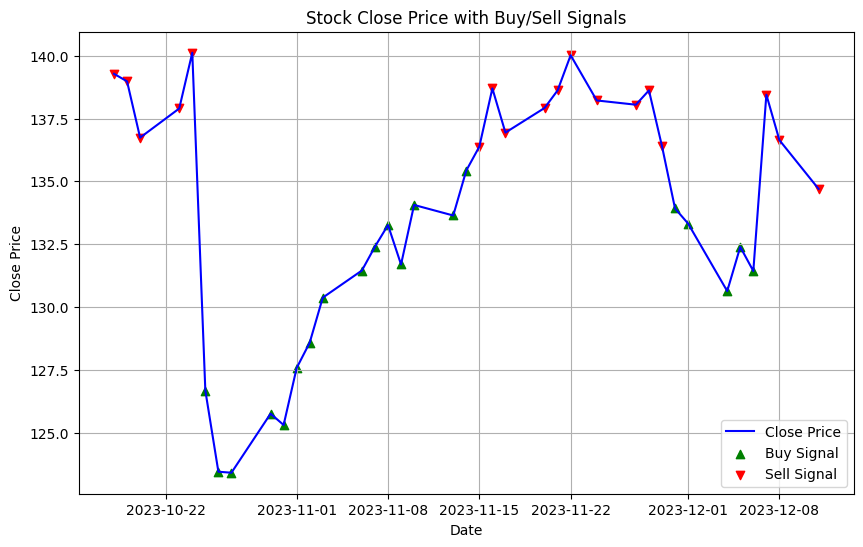

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Updated URLs with Raw file paths
url_GM_10years = 'https://raw.githubusercontent.com/Cosima2/Project-Python/main/GM_10years.csv'
url_GM_1year = 'https://raw.githubusercontent.com/Cosima2/Project-Python/main/GM_1year.csv'
url_GOOGL_10years = 'https://raw.githubusercontent.com/Cosima2/Project-Python/main/GOOGL-10years.csv'
url_GOOGL_1year = 'https://raw.githubusercontent.com/Cosima2/Project-Python/main/GOOGL_1year.csv'

# Read CSV files
data_GOOGL_1year = pd.read_csv(url_GOOGL_1year, parse_dates=['Date'], index_col='Date')

# Assuming 'data' is one of the datasets loaded, replace it with the desired data for analysis
data = data_GOOGL_1year

# Feature Engineering
data['SMA_50'] = data['Close'].rolling(window=50).mean()  # 50-day Simple Moving Average
data['SMA_200'] = data['Close'].rolling(window=200).mean()  # 200-day Simple Moving Average
data['Daily_Return'] = data['Close'].pct_change()  # Daily return
data.dropna(inplace=True)

# Define features and target variable
features = ['SMA_50', 'SMA_200', 'Daily_Return']
target = 'Close'

X = data[features]
y = data[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Evaluate model performance
train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")

# Example trading strategy based on predicted price vs. actual price
predicted_prices = model.predict(X)
data['Predicted_Close'] = predicted_prices

# Buy if predicted price > current price, sell if predicted price < current price
data['Signal'] = np.where(data['Predicted_Close'] > data['Close'], 1, -1)

# Calculate Cumulative Return
cumulative_return_strategy = (1 + data[data['Signal'] == 1]['Close'].pct_change()).cumprod().iloc[-1] - 1
cumulative_return_stock = (1 + data['Close'].pct_change()).cumprod().iloc[-1] - 1

# Calculate maximum drawdown
def calc_drawdown(cum_rets):
    running_max = np.maximum.accumulate(cum_rets)
    running_max[running_max < 1] = 1
    drawdown = (cum_rets) / running_max - 1
    return drawdown

cumulative_values = np.array(data['Close'])
drawdown = calc_drawdown(cumulative_values)
max_drawdown = np.min(drawdown)

# Calculate Sharpe Ratio
daily_returns_strategy = data[data['Signal'] == 1]['Close'].pct_change()
daily_returns_stock = data['Close'].pct_change()

sharpe_ratio_strategy = (daily_returns_strategy.mean() / daily_returns_strategy.std()) * np.sqrt(252)
sharpe_ratio_stock = (daily_returns_stock.mean() / daily_returns_stock.std()) * np.sqrt(252)

# Calculate mean return
mean_return_strategy = daily_returns_strategy.mean()
mean_return_stock = daily_returns_stock.mean()

# Calculate variance
variance_strategy = daily_returns_strategy.var()
variance_stock = daily_returns_stock.var()

# Filter out NaN values in both arrays and align them
valid_dates = daily_returns_strategy.index.intersection(daily_returns_stock.index)
daily_returns_strategy_aligned = daily_returns_strategy.loc[valid_dates]
daily_returns_stock_aligned = daily_returns_stock.loc[valid_dates]

# Calculate covariance
covariance = np.cov(daily_returns_strategy_aligned, daily_returns_stock_aligned)[0, 1]

# Calculate beta
beta = covariance / variance_stock


# Print backtest statistics
print("Backtest Statistics:")
print(f"Mean Return (Stock): {mean_return_stock:.4f}")
print(f"Mean Return (Strategy): {mean_return_strategy:.4f}")
print(f"Cumulative Return (Stock): {cumulative_return_stock * 100:.2f}%")
print(f"Cumulative Return (Strategy): {cumulative_return_strategy * 100:.2f}%")
print(f"Variance (Stock): {variance_stock:.4f}")
print(f"Variance (Strategy): {variance_strategy:.4f}")
print(f"Beta: {beta:.4f}")
print(f"Sharpe Ratio (Stock): {sharpe_ratio_stock:.4f}")
print(f"Sharpe Ratio (Strategy): {sharpe_ratio_strategy:.4f}")
print(f"Maximum Drawdown: {max_drawdown * 100:.2f}%")

# Plot stock price with buy/sell signals
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Close'], label='Close Price', color='blue')
plt.scatter(data[data['Signal'] == 1].index, data['Close'][data['Signal'] == 1], marker='^', color='g', label='Buy Signal')
plt.scatter(data[data['Signal'] == -1].index, data['Close'][data['Signal'] == -1], marker='v', color='r', label='Sell Signal')
plt.title('Stock Close Price with Buy/Sell Signals')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()